# Рекурсия
*Рекурсивная функция - это функция, которая вызывает сама себя.* В принципе, этого определения уже достаточно для понимания всего концепта. Но мы разберем, как это работает, почему это работает и зачем вообще нужно.




## Немного о функциях

Для понимания рекурсивных функций нужно понимать, а что вообще такое функция. Этот материал уже был изложен в занятии [01_Основы_Python_2](https://github.com/ShadarRim/dc2024/blob/main/01_%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_Python_2.ipynb), поэтому здесь проведем лишь небольшой recap. Если что-то остается непонятным - загляните туда.

Итак, функция - это просто часть обособленного кода, который мы можем многократно вызывать. Их стоит использовать либо для выделения повторяющихся конструкций, либо для отдельных логически выделенных частей функционала в больших программах. Функция может не возвращать значение вообще, может возвращать одно или несколько (на самом деле, в случае нескольких значений она, фактически, тоже возвращает одно, просто упаковывая все множество значений в один кортеж).

In [2]:
def no_value_returned():
  print('I return no value')

def one_value_returned():
  print('I return one value')
  return 5

def multiple_value_returned():
  print('I return multiple values')
  return 1, 'abc', 2.5

# как можно увидеть здесь, с функциями можно обращаться не только как с функциями,
# но и как с объектами. Так no_value_returned без скобочек - это объект функции,
# с которым мы можем что-то делать - передавать как аргумент, записывать в списки или кортежи и тд.
# А вот no_value_returned() со скобочками - это уже конкретно вызов функции,
# который вернет (ну или в данном случае, не вернет) какое-то значение
our_functions = [no_value_returned, one_value_returned, multiple_value_returned]

for func in our_functions:
  returned = func() # здесь осуществляется вызов функций, которые мы перебираем
  print('Values returned by calling this function:', returned)

I return no value
Values returned by calling this function: None
I return one value
Values returned by calling this function: 5
I return multiple values
Values returned by calling this function: (1, 'abc', 2.5)


Помимо возвращаемых значений у функций есть еще аргументы. Аргументом функции может быть буквально что угодно и их количество может быть неограничено. Аргументы могут быть с дефолтным значением и без него. Если у аргумента нет дефолтного значения, то его значение необходимо указать при вызове функции - иначе она не будет работать. Если же дефолтное значение есть, то оно будет использоваться, если не указано другое.

In [3]:
def some_func_with_args(no_default_argument,
                        default_argument = 1 # тут мы задаем дефолтное значение аргумента
                        ):
  print('My arguments are:', no_default_argument, default_argument)

some_func_with_args(0)
some_func_with_args(4, 5)
some_func_with_args()

My arguments are: 0 1
My arguments are: 4 5


TypeError: some_func_with_args() missing 1 required positional argument: 'no_default_argument'

Как видите, последний из вызовов приводит к ошибке - функция не знает, что должно лежать в `no_default_argument`, если он не указан. Кстати, аргументы не обязательно указывать по порядку, можно указать их напрямую через их имена

In [4]:
some_func_with_args(default_argument=5, no_default_argument=4) # поменяли порядок, все еще работает так же
some_func_with_args(5, 4) # а так поменяли порядок без указания, каким аргументам что присваиваем

My arguments are: 4 5
My arguments are: 5 4


Кстати, если функция не возвращает никакое значение, это не значит, что она не может использовать ключевое слово `return`. Его все еще можно использовать для раннего выхода из функции

In [5]:
def early_quit(parameter):
  if parameter < 5:
    return
  # какие-то вычисления
  parameter += 50
  print(parameter)

early_quit(4)
early_quit(50)

100


Функцию можно вызывать многократно. Но что происходит при этом с ее параметрами? Допустим, мы будем каким-то образом их менять внутри функции. Функция ниже вычитает единицу из своего параметра и больше ничего не делает

In [6]:
def i_decrement_my_parameter(parameter):
  parameter -= 1

initial_value = 5

i_decrement_my_parameter(initial_value)
i_decrement_my_parameter(initial_value)
i_decrement_my_parameter(initial_value)
i_decrement_my_parameter(initial_value)
i_decrement_my_parameter(initial_value)

print('Value after passing the function 5 times:', initial_value)

Value after passing the function 5 times: 5


Как видите, значение параметра вне функции не поменялось. Почему так? Дело в том, что при вызове функции она использует не те же самые переменные, которые мы ей передаем, а создает их копии. Эти копии называются локальными переменными и существуют только внутри функции (при завершении ее работы они удаляются из памяти). Это правило, однако, может завести вас с забавную ловушку, когда дело касается ссылочных типов данных. Посмотрим на пример ниже.

In [7]:
def i_am_evil(parameter):
  parameter[0] -= 1

initial_value = [5]

i_am_evil(initial_value)
i_am_evil(initial_value)
i_am_evil(initial_value)
i_am_evil(initial_value)
i_am_evil(initial_value)

print('Value after passing the function 5 times:', initial_value)

Value after passing the function 5 times: [0]


Что изменилось? Ну, мы только что нарушили правило, которое сами вроде как постулировали. Но на самом деле это не так. Дело в том, что списки в Python - это ссылочный тип данных. Эта концепция будет вам понятна, если вы знакомы с концепцией указателей, например, из Си. Так вот, когда мы передаем в функцию список, мы на самом деле передаем в нее ссылку на этот список - то есть адрес в памяти, по которому его можно найти. Функция, конечно, создает копию этого адреса, но сам список при этом не копирует. Поэтому, когда уже внутри функции мы обращаемся к первому элементу списка, мы обращаемся к элементу исходного списка, и изменяем его

## Рекурсивные функции
Итак, если обычные функции более-менее понятны, пришло время наконец разобраться с рекурсией. Прежде, чем мы начнем писать рекурсивные функции, неплохо бы понять, а зачем оно нам вообще надо. Из математики нам знакомы рекурсивные формулы - например, в которых следующий член какого-нибудь ряда задается через предыдущие. Простейший пример такого ряда - это числа Фибоначчи. Вот их мы и посчитаем при помощи рекурсии. Напомним формулу:
$F_n = F_{n-1} + F_{n-2}$

In [1]:
def fib_1(n):
  return fib_1(n-1) + fib_1(n-2)

n = 5
print(n, 'Fibonacci number is:', fib_1(n))

RecursionError: maximum recursion depth exceeded

### Базовый случай
И это... Не работает. Почему? Тут мы встречаем такое понятие, как базовый случай рекурсии. Дело в том, что в наша функция на самом деле будет выполняться бесконечно. Хотя мы бы хотели, чтобы она дошла до нуля, ведь нулевое и первое числа Фибоначчи мы знаем - это 0 и 1. Однако сейчас в ней нет никакого условия, говорящего, что пора остановиться - поэтому она продолжает вызывать саму себя бесконечно, а вернее, пока не упрется в заранее опредленный предел рекурсии. Базовый случай или условие остановки - неотъемлемая часть любой рекурсивной функции. Добавим его

In [8]:
def fib_2(n):
  if n < 2: # базовый случай
    return n
  else:
    return fib_2(n-1) + fib_2(n-2)

n = 5
print(n, 'Fibonacci number is:', fib_2(n))

5 Fibonacci number is: 5


### Визуализация
Ура, работает! Но как именно? Как правило, когда речь идет о рекурсии, возникает два вопроса:
1. Что происходит с локальными переменными функции? Перезаписываются ли они каждым вызовом функции?
2. Как происходят вычисления в принципе?

С локальными переменными все довольно просто. Каждый раз, когда мы вызываем функцию, мы создаем копию исходного объекта этой функции. То есть, если функция вызывает саму себя, она вызывает не себя же повторно, а создает свою копию и вызывает ее. Поэтому локальные переменные у каждой такой вызванной функции будут "свои" и не перемешаются.

Что же касается вычислений, то проще всего продемонстрировать это на примере. Код ниже добавляет визуализацию вычислений в нашу рекурсивную функцию для числе Фибоначчи. Вам не нужно разбираться, как именно это сделано, достаточно понимания того, что эта функция работает так же, как `fib_2`, поэтому вы можете считать представленный ниже граф вычислений графом `fib_2`. Числа слева сверху от каждой ячейки соответствуют порядковому номеру, в соответствии с которым вызывается каждая ячейка. Вы можете поиграться со значением `n`, чтобы лучше понять процесс

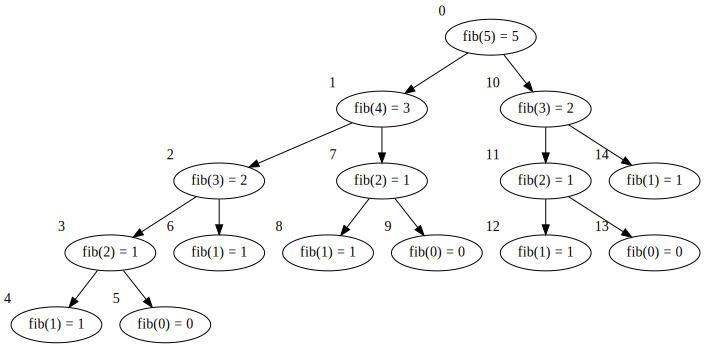

5 Fibonacci number is: 5


In [9]:
# _____DON'T NEED TO UNDERSTAND THIS CODE (IT'S JUST FOR VUSUALIZING PURPOSE)_____

from graphviz import Digraph
from IPython.display import display

counter = 0

def draw_graph(n, fib_cache, dot, parent=None):
    global counter
    current_counter = counter
    current_node = f"fib({n})-{current_counter}"

    fib_value = fib_cache[n]
    dot.node(current_node, f"fib({n}) = {fib_value}\n", xlabel=f"{current_counter}")

    if parent is not None:
        dot.edge(parent, current_node)
    counter += 1

    if n < 2:
        return 1
    else:
        left = draw_graph(n - 1, fib_cache, dot, current_node)
        right = draw_graph(n - 2, fib_cache, dot, current_node)
        return left + right

def fill_fib_cache(n, cache):
  if n < 2:
    res = n
  else:
    res = fill_fib_cache(n-1, cache) + fill_fib_cache(n-2, cache)
  cache[n] = res
  return res

def fib_visual(n):
  dot = Digraph()
  fib_cache = dict()

  fill_fib_cache(n, fib_cache)
  draw_graph(n, fib_cache, dot)
  display(dot)

  return fib_cache[n]
# __________________________________END OF BLOCK__________________________________


n = 5
print(n, 'Fibonacci number is:', fib_visual(n))

### Мемоизация
Если вы пробовали поставить значение n в районе 10 и больше, то могли заметить, что граф становится очень громоздким довольно быстро. Да, наша функция для чисел Фибоначчи получилась довольно неэффективной. Дело в том, что разные подфункции, вызываемые рекурсивно, не знают о существовании друг друга и в итоге считают одни и те же значения по несколько раз. Справиться с этим можно при помощи запоминания или мемоизации. Запоминая посчитанные значения, мы можем "обрезать" лишние ветви рекурсии

In [10]:
def fib_3(n, memo):
  if n not in memo:
    memo[n] = fib_3(n-1, memo) + fib_3(n-2, memo) # мемоизация
  return memo[n]

# просто небольшая функция для измерения временных затрат, можно на нее особо не смотреть
def measure_time(func, *args):
    import time
    tic = time.time()
    func(*args)
    toc = time.time()
    return toc - tic

memo = {0: 0,
        1: 1}

n = 20
print(n, 'Fibonacci number is:', fib_3(n, memo))
print('Time for fib_2:', measure_time(fib_2, n) * 1000, 'miliseconds')
print('Time for fib_3:', measure_time(fib_3, n, memo) * 1000, 'miliseconds')

20 Fibonacci number is: 6765
Time for fib_2: 3.9124488830566406 miliseconds
Time for fib_3: 0.0016689300537109375 miliseconds


### Рекурсия и итерирование
У рекурсии есть одно забавное свойство - вы всегда можете обойтись без нее. На самом деле любая задача, которую можно решить при помощи рекурсии, решается и при помощи итерирования, то есть старым добрым циклом. Более того, зачастую цикл будет и эффективнее - ведь не надо каждый раз создавать в памяти новую функцию и передавать ей управление.

Почему же тогда рекурсию вообще используют? Как правило потому что рекурсивный подход для конкретной задачи оказывается проще для понимания и / или реализации, чем итеративный.

Попробуем решить задачу с числами Фибоначчи итеративным методом

In [11]:
def fib_4(n):
  if n < 2:
    return n

  last, next = 0, 1 # в Python можно выполнять присваивание нескольких переменных в одной строке.
  # На самом деле это происходит благодаря распаковке кортежа, но вдаваться в это необязательно
  for _ in range(1, n):
    last, next = next, last + next

  return next

n = 40
print(n, 'Fibonacci number is:', fib_4(n))

memo = {0: 0,
        1: 1}
print('Time for fib_3:', measure_time(fib_3, n, memo) * 1000, 'miliseconds')
print('Time for fib_4:', measure_time(fib_4, n) * 1000, 'miliseconds')

40 Fibonacci number is: 102334155
Time for fib_3: 0.04601478576660156 miliseconds
Time for fib_4: 0.0059604644775390625 miliseconds


### Задача посложнее
Еще одним примером известной задачи на рекурсию является задача о Ханойских башнях.

**Условие задачи:** Есть три стержня (A, B и C) и n дисков разного диаметра, расположенных на первом стержне (A) в виде конуса, то есть так, что наибольший диск находится внизу, а наименьший — вверху. Задача заключается в том, чтобы перенести все диски с первого стержня (A) на третий стержень (C) с соблюдением следующих правил:

1. За один ход можно перемещать только один диск.
2. Нельзя класть больший диск на меньший.
3. Для перемещения дисков можно использовать вспомогательный стержень (B).
**Цель задачи:** Переместить все диски с первого стержня (A) на третий стержень (C), используя минимальное количество ходов.

Минимальное количество ходов для решения задачи определяется формулой
$2^n - 1$, где $n$ — количество дисков.

Мы приведем решение задачи при помощи рекурсии. Оно формулируется доволно просто. Мы знаем, как решить задачу в случае одного диска (просто переложить его на нужный стержень), а для большего числа дисков нам достаточно сделать следующее:
1. Сначала решить задачу о перемещении $n-1$ дисков с первого на второй стержень, используя третий как вспомогательный;
2. Затем перенести $n$-ный (самый большой) диск на третий стержень.
3. И, наконец, снове решить задачу о перемещении $n-1$ дисков, но теперь с второго на третий стержень, используя первый как вспомогательный.

Решение при помощи итеративного подхода предлагаем вам написать самостоятельно

In [12]:
def hanoi_recursive(n, source, target, auxiliary):
    """
    Рекурсивная функция для решения задачи Ханойских башен.

    n: количество дисков
    source: стержень, с которого нужно переместить диски
    target: стержень, на который нужно переместить диски
    auxiliary: вспомогательный стержень
    """
    if n == 1: # базовый случай
        print(f"Переместить диск 1 с {source} на {target}")
        return

    # 1. Перемещаем n-1 дисков со стержня source на вспомогательный стержень auxiliary
    hanoi_recursive(n - 1, source, auxiliary, target)

    # 2. Перемещаем оставшийся диск с source на target
    print(f"Переместить диск {n} с {source} на {target}")

    # 3. Перемещаем n-1 дисков со вспомогательного стержня auxiliary на стержень target
    hanoi_recursive(n - 1, auxiliary, target, source)

n = 3  # Количество дисков
hanoi_recursive(n, 'A', 'C', 'B')

Переместить диск 1 с A на C
Переместить диск 2 с A на B
Переместить диск 1 с C на B
Переместить диск 3 с A на C
Переместить диск 1 с B на A
Переместить диск 2 с B на C
Переместить диск 1 с A на C
